In [327]:
from mgmt.data_science.plot_center_mass import (
    load_data,
    convert_to_255
)
from mgmt.data_science.dataframe import (
    tumor_dataframe,
    tumor_slice_dataframe
)
import matplotlib.pyplot as plt
import numpy as np
from monai.visualize import blend_images, matshow3d
from monai.transforms.utils import rescale_array

from PIL import Image


import matplotlib.patches as mpatches

import plotly.express as px

import matplotlib
%matplotlib inline

%load_ext autoreload
%autoreload 2

# import plotly.offline as pyo
# Set notebook mode to work in offline
# pyo.init_notebook_mode()

import plotly
plotly.io.renderers.default = "iframe"

import cv2
import copy

from monai.apps.detection.transforms.box_ops import convert_mask_to_box
from matplotlib import cm

from collections import defaultdict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = load_data("/home/bryan/data/brain_tumor/caidm_3d_96/data.npz")
tumor_df = tumor_dataframe(data)

2023-05-09 06:30:39.679 | INFO     | mgmt.data_science.dataframe:tumor_dataframe:45 - tumor_dataframe: adding center of mass
2023-05-09 06:30:40.924 | INFO     | mgmt.data_science.dataframe:tumor_dataframe:47 - tumr_dataframe: adding tumor quadrant
2023-05-09 06:30:40.930 | INFO     | mgmt.data_science.dataframe:tumor_dataframe:49 - tumor_dataframe: adding pixel statistics


In [4]:
slice_dfs = tumor_slice_dataframe(data)

In [6]:
slice_dfs[10]

,slice,tumor_area,tumor_x_min,tumor_x_max,tumor_y_min,tumor_y_max,tumor_height,tumor_width,t2w_tumor_mean,t2w_tumor_median,...,t1c_tumor_min,t1c_tumor_max,t1c_non_tumor_mean,t1c_non_tumor_median,t1c_non_tumor_min,t1c_non_tumor_max,t1c_flip_tumor_mean,t1c_flip_tumor_median,t1c_flip_tumor_min,t1c_flip_tumor_max
0,0,0,0,0,0,0,0,0,NaN,NaN,...,NaN,NaN,-1.322857,-1.189736,-2.463013,0.600540,NaN,NaN,NaN,NaN
1,1,0,0,0,0,0,0,0,NaN,NaN,...,NaN,NaN,-0.853086,-0.593390,-2.463013,1.131176,NaN,NaN,NaN,NaN
2,2,0,0,0,0,0,0,0,NaN,NaN,...,NaN,NaN,-0.669411,-0.493586,-2.463013,2.030033,NaN,NaN,NaN,NaN
3,3,0,0,0,0,0,0,0,NaN,NaN,...,NaN,NaN,-0.544667,-0.397502,-2.463013,3.082625,NaN,NaN,NaN,NaN
4,4,0,0,0,0,0,0,0,NaN,NaN,...,NaN,NaN,-0.438003,-0.328073,-2.463013,2.659853,NaN,NaN,NaN,NaN
5,5,0,0,0,0,0,0,0,NaN,NaN,...,NaN,NaN,-0.336977,-0.217730,-2.463013,3.702527,NaN,NaN,NaN,NaN
6,6,0,0,0,0,0,0,0,NaN,NaN,...,NaN,NaN,-0.251626,-0.134663,-2.463013,4.000000,NaN,NaN,NaN,NaN
7,7,0,0,0,0,0,0,0,NaN,NaN,...,NaN,NaN,-0.282536,-0.125985,-2.463013,4.000000,NaN,NaN,NaN,NaN
8,8,0,0,0,0,0,0,0,NaN,NaN,...,NaN,NaN,-0.298820,-0.127225,-2.463013,4.000000,NaN,NaN,NaN,NaN
9,9,0,0,0,0,0,0,0,NaN,NaN,...,NaN,NaN,-0.279634,-0.214011,-2.463013,4.000000,NaN,NaN,NaN,NaN


In [7]:
tumor_df

,patient,methylation,tumor_volume,tumor_volume_rel_%,tumor_area_max,tumor_area_max_slice,tumor_center_of_mass_slice,tumor_center_of_mass_H,tumor_center_of_mass_W,tumor_quadrant,...,t1c_tumor_min,t1c_tumor_max,t1c_non_tumor_mean,t1c_non_tumor_median,t1c_non_tumor_min,t1c_non_tumor_max,t1c_flip_tumor_mean,t1c_flip_tumor_median,t1c_flip_tumor_min,t1c_flip_tumor_max
0,0,True,5717,1.292363,670,21,20.905020,24.423999,61.561658,1,...,-1.075736,4.000000,-0.057360,-0.013417,-2.281739,4.0,0.078343,0.150288,-1.652827,3.392599
1,1,True,23373,5.283610,1756,22,23.913276,34.328071,61.086638,1,...,-1.302736,4.000000,-0.063860,0.000190,-2.291610,4.0,0.248084,0.297372,-2.292908,4.000000
2,2,False,12074,2.729402,921,36,36.650157,43.096074,54.470764,1,...,-1.348343,4.000000,-0.031157,0.046861,-2.442369,4.0,0.330724,0.058445,-2.443656,4.000000
3,3,True,19164,4.332140,1389,31,31.888958,61.274682,66.145533,4,...,-2.076559,4.000000,-0.043200,-0.042124,-2.075438,4.0,0.218822,0.256596,-2.076559,3.845161
4,4,True,20382,4.607476,1490,24,25.222746,19.678344,51.455353,1,...,-2.116908,4.000000,-0.051701,-0.018406,-2.115858,4.0,0.355529,-0.019456,-2.116908,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,560,True,15556,3.516529,1124,30,30.484122,63.029763,36.336333,3,...,-1.106425,4.000000,-0.072441,0.272946,-2.784820,4.0,0.740267,0.697368,-2.794466,3.890177
561,561,True,7873,1.779740,771,18,19.575384,60.721326,72.918328,4,...,-0.526427,4.000000,-0.045537,0.131435,-2.829399,4.0,0.749785,0.741072,-0.862182,2.592731
562,562,True,8465,1.913565,708,30,29.628352,37.658476,28.221973,2,...,-1.603229,4.000000,-0.022412,0.127336,-2.869855,4.0,0.258106,0.348259,-1.986163,3.441184
563,563,False,15276,3.453234,1240,30,28.408811,38.754844,55.287444,1,...,-1.508115,3.508901,-0.040928,0.231298,-2.680623,4.0,0.341521,0.389954,-2.681590,2.243522


In [335]:
def mask_to_bbox(mask):
    bboxes, bbox_classifications = convert_mask_to_box(mask, bg_label=0)
    # bboxes are y1,x1,y2,x2
    # convert to x1,y1,x2,y2
    bboxes_xy = np.zeros_like(bboxes)
    bboxes_xy[:,0] = bboxes[:,1]
    bboxes_xy[:,1] = bboxes[:,0]
    bboxes_xy[:,2] = bboxes[:,3]
    bboxes_xy[:,3] = bboxes[:,2]
    bboxes_xy = bboxes_xy.astype(int)
    if len(bboxes_xy) == 0:
        return np.array([0,0,0,0], dtype=int)
    return bboxes_xy[0] # single box    
    
def add_center_of_mass_box(df, data):
    cols = defaultdict(list)
    for patient_i in range(data["tum"].shape[0]):
        slice_i = int(np.round(df.tumor_center_of_mass_slice[patient_i]))
        tum = data["tum"][patient_i, slice_i, ..., 0][None, :]
        bbox = mask_to_bbox(tum)
        cols["tumor_center_of_mass_x_min"].append(bbox[0])
        cols["tumor_center_of_mass_y_min"].append(bbox[1])
        cols["tumor_center_of_mass_x_max"].append(bbox[2])
        cols["tumor_center_of_mass_y_max"].append(bbox[3])
        cols["tumor_center_of_mass_width"].append(bbox[2] - bbox[0])
        cols["tumor_center_of_mass_height"].append(bbox[3] - bbox[1])

    for k,v in cols.items():
        df[k] = v
    return df

In [336]:
tumor_df = add_center_of_mass_box(tumor_df, data)

In [80]:
patient_i = 148
modality = "fla"
row = tumor_df.iloc[patient_i]
s = int(np.round(row["tumor_center_of_mass_slice"]))
image = blend_images(
    # convert from BDHWC to HWC CHW where C=1, and D=48 3D depth channels
    image=np.transpose(data[modality][patient_i, s, ...], axes=(2, 0, 1)),
    label=np.transpose(data["tum"][patient_i, s, ...], axes=(2, 0, 1)),
    alpha=0.25,
    cmap="hsv",
    rescale_arrays=True,
)

In [392]:
def get_patient_image(patient_i, slice_i, modality="fla"):
    center_x = int(tumor_df.tumor_center_of_mass_W[patient_i])
    center_y = int(tumor_df.tumor_center_of_mass_H[patient_i])
    
    image = blend_images(
        # convert from BDHWC to HWC CHW where C=1, and D=48 3D depth channels
        image=np.transpose(data[modality][patient_i, slice_i, ...], axes=(2, 0, 1)),
        label=np.transpose(data["tum"][patient_i, slice_i, ...], axes=(2, 0, 1)),
        alpha=0.25,
        cmap="hsv",
        rescale_arrays=True,
    )
    image = np.moveaxis(image, 0, -1)  # CHW -> HWC
    image = convert_to_255(image)
    image = np.ascontiguousarray(image)
    
    print(image.shape)
    
    image = cv2.circle(image, (center_x, center_y), radius=1, color=(255,255,0), thickness=-1)

    bboxes, bbox_classifications = convert_mask_to_box(
        data["tum"][patient_i, slice_i, ..., 0][None, :],
        bg_label=0
    )
    # bboxes are y1,x1,y2,x2
    # convert to x1,y1,x2,y2
    bboxes_xy = np.zeros_like(bboxes)
    bboxes_xy[:,0] = bboxes[:,1]
    bboxes_xy[:,1] = bboxes[:,0]
    bboxes_xy[:,2] = bboxes[:,3]
    bboxes_xy[:,3] = bboxes[:,2]
    bboxes_xy = bboxes_xy.astype(int)
    bbox = bboxes_xy[0]
    image = cv2.rectangle(image, bbox[:2], bbox[2:], color=(255,255,0), thickness=1)
    return image

(96, 96, 3)


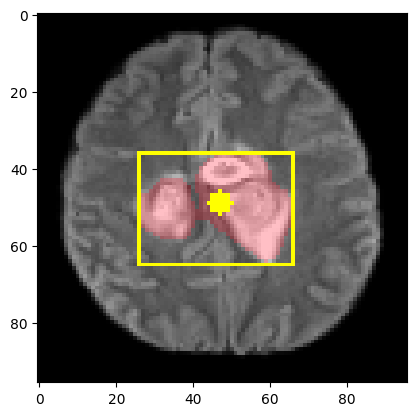

In [388]:
plt.imshow(get_patient_image(147, 33))

In [76]:
from monai.transforms import CropForeground, SpatialCrop
from monai.apps.detection.transforms.box_ops import convert_mask_to_box
from monai.apps.detection.transforms.array import SpatialCropBox

In [205]:
tum = data["tum"][148, 24, ...]
tum = np.moveaxis(tum, -1, 0) # HWC -> CHW
cropper = CropForeground(select_fn = lambda x: x == 1, return_coords=True)

In [206]:
cropper(tum)

(tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8),
 array([40, 23]),
 array([76, 88]))

In [49]:
cropper.compute_bounding_box(tum)

(array([ 6, 28]), array([59, 82]))

In [214]:
tum = data["tum"][patient_i, 31, ..., 0]
tum = tum[None, :]

In [215]:
tum2 = np.repeat(tum, 2, axis=0)

In [216]:
tum2.shape

(2, 96, 96)

In [197]:
tum.shape

(48, 96, 96)

In [217]:
bboxes, bbox_classifications = convert_mask_to_box(tum2, bg_label=0)

In [218]:
bboxes

array([[56., 28., 70., 74.],
       [56., 28., 70., 74.]], dtype=float32)

In [189]:
tum = data["tum"][148, ..., 0]
bboxes, bbox_classifications = convert_mask_to_box(tum[[24], :], bg_label=0)

In [198]:
image = get_patient_image(148, 24)

In [199]:
bboxes_xy = np.zeros_like(bboxes)
bboxes_xy[:,0] = bboxes[:,1]
bboxes_xy[:,1] = bboxes[:,0]
bboxes_xy[:,2] = bboxes[:,3]
bboxes_xy[:,3] = bboxes[:,2]
bboxes_xy = bboxes_xy.astype(int)
bbox = bboxes_xy[0]

In [200]:
image = cv2.rectangle(image, pt1=bbox[:2], pt2=bbox[2:], color=(0,255,0), thickness=1)

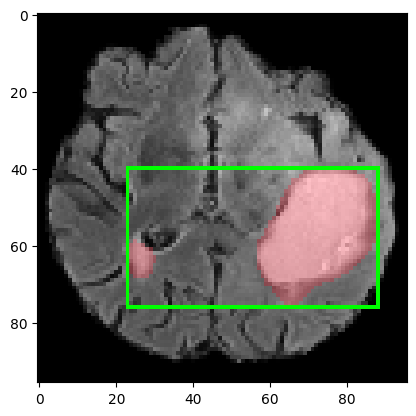

In [201]:
plt.imshow(image)

In [374]:
def slide_box_within_border(
    center_x,
    center_y,
    image_width,
    image_height,
    box_width=40,
    box_height=None,
):
    width_half = int(box_width/2)
    if box_height is None:
        height_half = width_half
    else:
        height_half = int(box_height/2)
    
    # bound the center point
    min_x = width_half
    max_x = image_width - width_half
    min_y = height_half
    max_y = image_height - height_half
    center_x = max(center_x, min_x)
    center_x = min(center_x, max_x)
    center_y = max(center_y, min_y)
    center_y = min(center_y, max_y)
    return center_x, center_y

In [389]:
row = tumor_df.iloc[226]
slice_i = int(np.round(row["tumor_center_of_mass_slice"]))
center_y = int(np.round(row["tumor_center_of_mass_H"]))
center_x = int(np.round(row["tumor_center_of_mass_W"]))

mri = data["fla"][226, ...]  # slice, H, W, C

# center_x = 85

center_x, center_y = slide_box_within_border(
    center_x, center_y,
    96, 96,
    box_width=40
)

mri = np.transpose(mri, axes=(3, 0, 1, 2))
# mri = np.transpose(mri, axes=(3, 1, 2, 0))
spatial_crop = SpatialCrop(
    roi_center = (slice_i, center_y, center_x),
    roi_size=(9, 40, 40)
)

In [390]:
mri_crop = spatial_crop(mri)

In [381]:
mri_crop.shape

torch.Size([1, 9, 40, 40])

In [316]:
slice_i

36

In [382]:
center_x

76

(96, 96, 3)


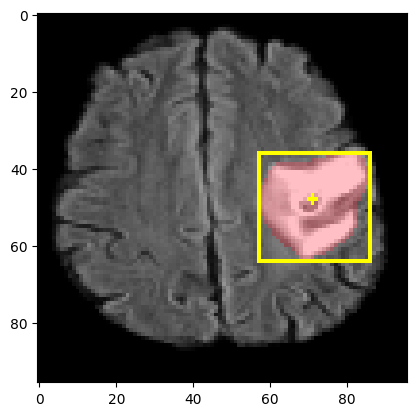

In [393]:
plt.imshow(get_patient_image(226, 36))

In [384]:
def view_mri_crop(mri_crop):
    image = mri_crop[0]
    image = rescale_array(image)
    fig, im = matshow3d(
        image,
        fig=None,
        title="MRI crop",
        every_n=1,
        frame_dim=0,
        cmap="gray",
    )
    return fig, im

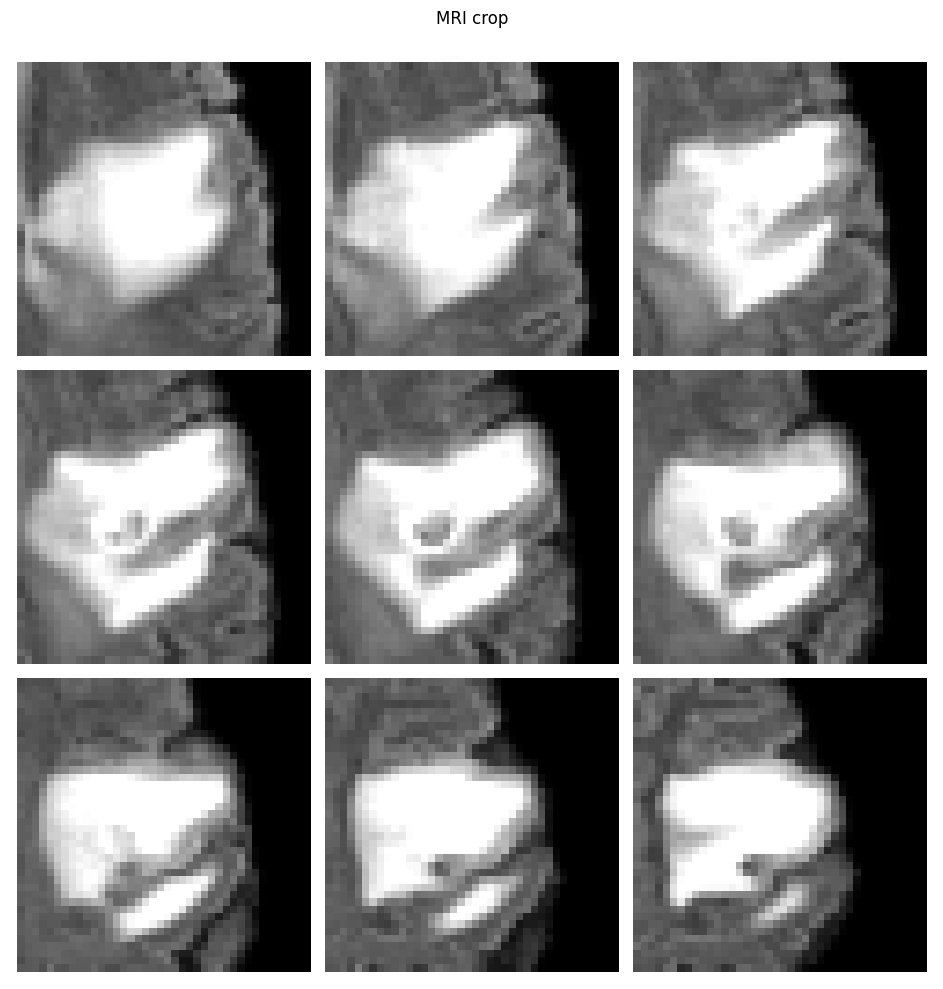

In [385]:
fig, im = view_mri_crop(mri_crop)

In [310]:
SpatialCropBox??

In [320]:
spatial_crop.slices

[slice(32, 41, None), slice(23, 73, None), slice(46, 96, None)]

In [312]:
slice_i

36

In [321]:
# average width and height of center of mass bounding box

In [322]:
tumor_df.tumor_center_of_mass_H.median()

49.48341232227488

In [323]:
tumor_df.tumor_center_of_mass_W.median()

48.848327508736894

In [ ]:
tumor_df.tumor_center_of_mass_H.median()

In [324]:
# tumor_df add center of mass box.
tumor_df

,patient,methylation,tumor_volume,tumor_volume_rel_%,tumor_area_max,tumor_area_max_slice,tumor_center_of_mass_slice,tumor_center_of_mass_H,tumor_center_of_mass_W,tumor_quadrant,...,t1c_tumor_min,t1c_tumor_max,t1c_non_tumor_mean,t1c_non_tumor_median,t1c_non_tumor_min,t1c_non_tumor_max,t1c_flip_tumor_mean,t1c_flip_tumor_median,t1c_flip_tumor_min,t1c_flip_tumor_max
0,0,True,5717,1.292363,670,21,20.905020,24.423999,61.561658,1,...,-1.075736,4.000000,-0.057360,-0.013417,-2.281739,4.0,0.078343,0.150288,-1.652827,3.392599
1,1,True,23373,5.283610,1756,22,23.913276,34.328071,61.086638,1,...,-1.302736,4.000000,-0.063860,0.000190,-2.291610,4.0,0.248084,0.297372,-2.292908,4.000000
2,2,False,12074,2.729402,921,36,36.650157,43.096074,54.470764,1,...,-1.348343,4.000000,-0.031157,0.046861,-2.442369,4.0,0.330724,0.058445,-2.443656,4.000000
3,3,True,19164,4.332140,1389,31,31.888958,61.274682,66.145533,4,...,-2.076559,4.000000,-0.043200,-0.042124,-2.075438,4.0,0.218822,0.256596,-2.076559,3.845161
4,4,True,20382,4.607476,1490,24,25.222746,19.678344,51.455353,1,...,-2.116908,4.000000,-0.051701,-0.018406,-2.115858,4.0,0.355529,-0.019456,-2.116908,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,560,True,15556,3.516529,1124,30,30.484122,63.029763,36.336333,3,...,-1.106425,4.000000,-0.072441,0.272946,-2.784820,4.0,0.740267,0.697368,-2.794466,3.890177
561,561,True,7873,1.779740,771,18,19.575384,60.721326,72.918328,4,...,-0.526427,4.000000,-0.045537,0.131435,-2.829399,4.0,0.749785,0.741072,-0.862182,2.592731
562,562,True,8465,1.913565,708,30,29.628352,37.658476,28.221973,2,...,-1.603229,4.000000,-0.022412,0.127336,-2.869855,4.0,0.258106,0.348259,-1.986163,3.441184
563,563,False,15276,3.453234,1240,30,28.408811,38.754844,55.287444,1,...,-1.508115,3.508901,-0.040928,0.231298,-2.680623,4.0,0.341521,0.389954,-2.681590,2.243522


In [325]:
tumor_df.columns

Index(['patient', 'methylation', 'tumor_volume', 'tumor_volume_rel_%',
       'tumor_area_max', 'tumor_area_max_slice', 'tumor_center_of_mass_slice',
       'tumor_center_of_mass_H', 'tumor_center_of_mass_W', 'tumor_quadrant',
       't2w_tumor_mean', 't2w_tumor_median', 't2w_tumor_min', 't2w_tumor_max',
       't2w_non_tumor_mean', 't2w_non_tumor_median', 't2w_non_tumor_min',
       't2w_non_tumor_max', 't2w_flip_tumor_mean', 't2w_flip_tumor_median',
       't2w_flip_tumor_min', 't2w_flip_tumor_max', 'fla_tumor_mean',
       'fla_tumor_median', 'fla_tumor_min', 'fla_tumor_max',
       'fla_non_tumor_mean', 'fla_non_tumor_median', 'fla_non_tumor_min',
       'fla_non_tumor_max', 'fla_flip_tumor_mean', 'fla_flip_tumor_median',
       'fla_flip_tumor_min', 'fla_flip_tumor_max', 't1w_tumor_mean',
       't1w_tumor_median', 't1w_tumor_min', 't1w_tumor_max',
       't1w_non_tumor_mean', 't1w_non_tumor_median', 't1w_non_tumor_min',
       't1w_non_tumor_max', 't1w_flip_tumor_mean', 't1w_flip

In [338]:
tumor_df.tumor_center_of_mass_width.median()

35.0

In [343]:
vals = tumor_df.tumor_center_of_mass_width
print(len(vals))
vals = vals[vals > 0]
print(len(vals))
vals.median()

565
562


35.0

In [344]:
vals = tumor_df.tumor_center_of_mass_height
print(len(vals))
vals = vals[vals > 0]
print(len(vals))
vals.median()

565
562


39.0

In [340]:
tumor_df.tumor_center_of_mass_width.max()

91

In [342]:
tumor_df.tumor_center_of_mass_width.argmin()

427